<a href="https://colab.research.google.com/github/yash251/TheSparksFoundationTasks/blob/main/TSF_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Yash Jagtap**

#GRIP Task 2 : Prediction using Unsupervised ML

**Importing all the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

**Importing dataset**

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data , columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Predicting the optimum number of clusters for K Means . Determining the value of K**

In [3]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

SSE = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)

SSE

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25600931571815,
 46.44618205128205,
 39.03998724608725,
 34.299712121212124,
 30.014398496240602,
 28.036906353450473,
 26.53452922077922]

**The Elbow Curve**

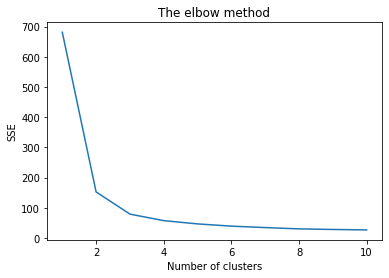

In [4]:
# Plotting the results onto a line graph, 

plt.plot(range(1, 11), SSE)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [5]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

**Visualising the clusters**

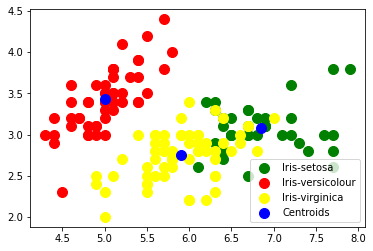

In [6]:
plt.scatter(x[y_kmeans == 0, 0] , x[y_kmeans == 0, 1] , s = 100, c = 'green', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0] , x[y_kmeans == 1, 1] , s = 100, c = 'red', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0] , x[y_kmeans == 2, 1] , s = 100, c = 'yellow', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0] , kmeans.cluster_centers_[:,1] , s = 100, c = 'blue', label = 'Centroids')

plt.legend()

**Inference -: k = 3 is the optimum no. of clusters**